# Drug Classification

## Implementing KNN Classifier for Drug Classification

Reference: 

Comparison of Drug Type Classification Performance Using KNN Algorithm

DOI: 10.33395/sinkron.v7i3.11487

Febri Aldi, Irohito Nozomi, Soeheri, Volume 6, Number 3, July 2022

In [1]:
#Import the required libraries
#Data management
import pandas as pd
import numpy as np

In [2]:
#import sampling
from sklearn.model_selection import train_test_split

In [3]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [5]:
#Modeling and validation
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
#Read the data
df = pd.read_csv("Drug_Data.csv")

## Descriptive Analytics

In [7]:
# Extension to the paper
# Sample data screening
# Check the data size
# Check the data types
# Check the stats

In [8]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
100,31,M,HIGH,NORMAL,11.871,drugA
143,74,M,HIGH,NORMAL,15.436,DrugY
110,50,M,HIGH,HIGH,7.490,drugA
37,39,M,LOW,NORMAL,13.938,drugX
91,41,M,HIGH,NORMAL,15.156,DrugY


In [9]:
print('Number of records: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of records:  200
Number of columns:  6


In [10]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

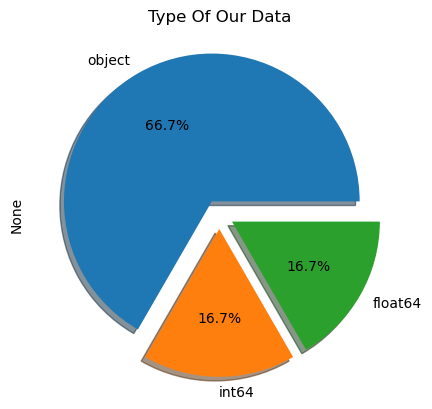

In [12]:
df.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct="%1.1f%%", shadow=True)
plt.title("Type Of Our Data");

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [14]:
df.describe().style.background_gradient(cmap="Blues")

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [15]:
# Checking for null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Analysis and exploration of categories of the each feature

<AxesSubplot:ylabel='Density'>

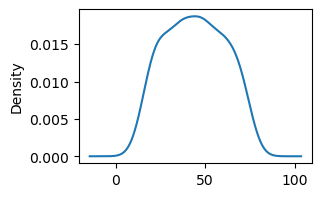

In [16]:
df.Age.plot.density(figsize = (3, 2))

<AxesSubplot:ylabel='Density'>

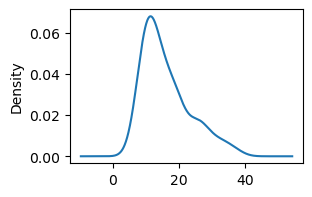

In [17]:
df.Na_to_K.plot.density(figsize = (3, 2))

[Text(0, 0, '96'), Text(0, 0, '104')]

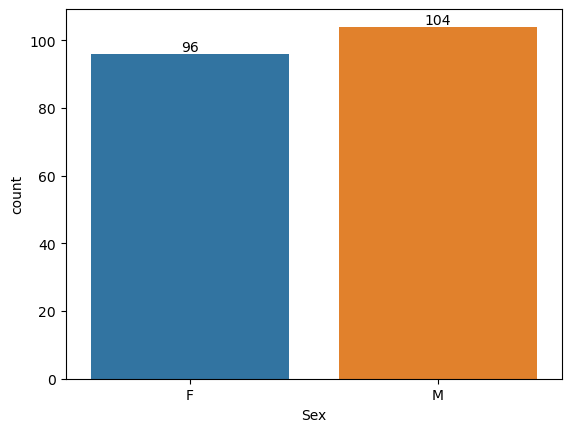

In [18]:
ax = sns.countplot(df['Sex'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '77'), Text(0, 0, '64'), Text(0, 0, '59')]

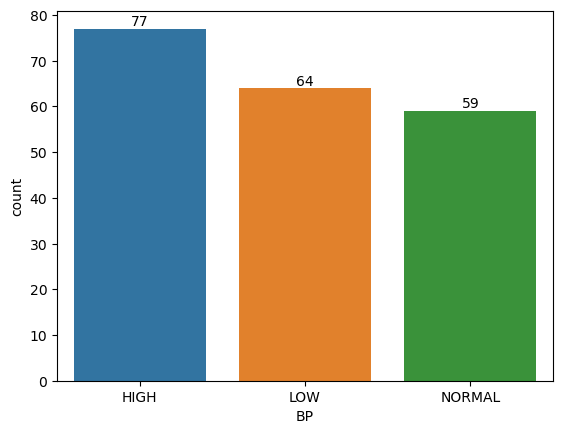

In [19]:
ax = sns.countplot(df['BP'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '103'), Text(0, 0, '97')]

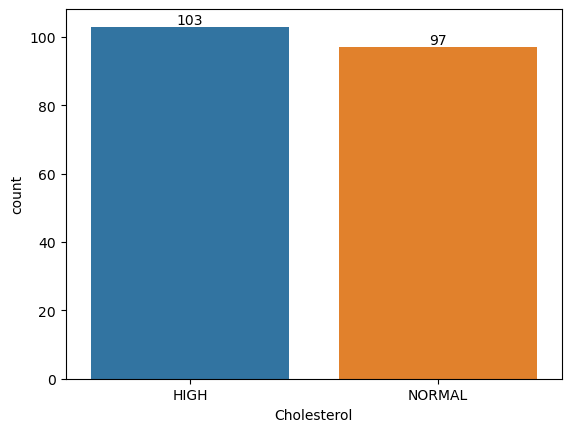

In [20]:
ax = sns.countplot(df['Cholesterol'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '91'),
 Text(0, 0, '16'),
 Text(0, 0, '54'),
 Text(0, 0, '23'),
 Text(0, 0, '16')]

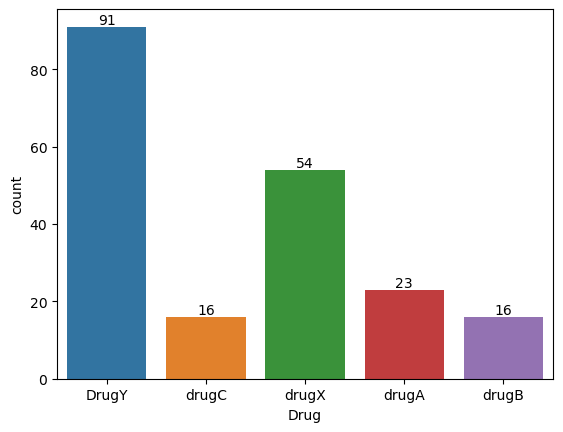

In [21]:
ax = sns.countplot(df['Drug'])
ax.bar_label(ax.containers[0])

(array([33., 30., 36., 38., 33., 30.]),
 array([15.        , 24.83333333, 34.66666667, 44.5       , 54.33333333,
        64.16666667, 74.        ]),
 <BarContainer object of 6 artists>)

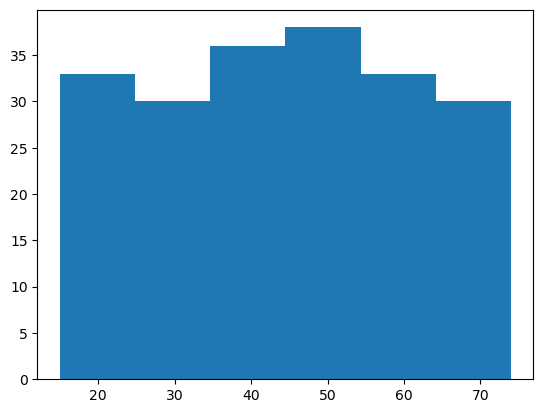

In [22]:
plt.hist(df['Age'],bins=6)

<AxesSubplot:xlabel='Age'>

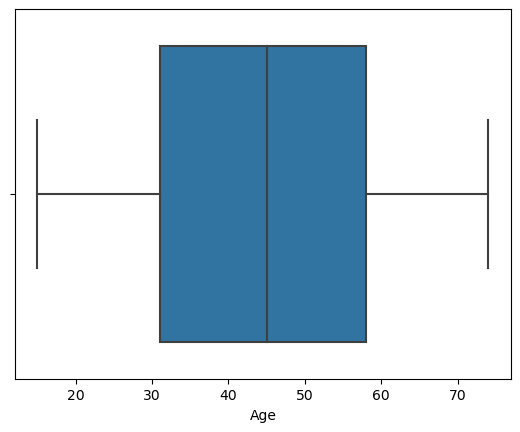

In [23]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Na_to_K'>

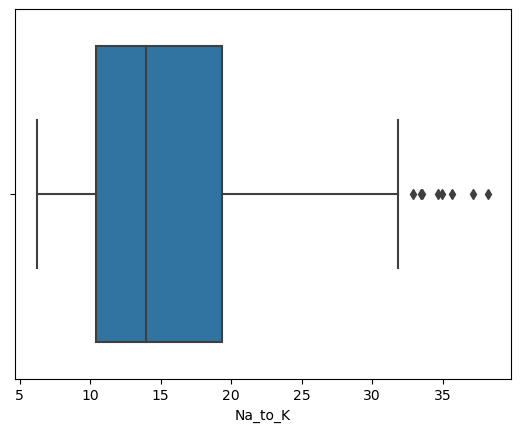

In [24]:
sns.boxplot(df['Na_to_K'])

                                             |                                             | [  0%]   00:00 ->…


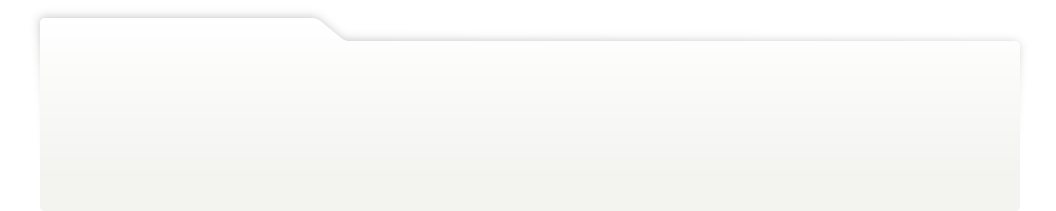
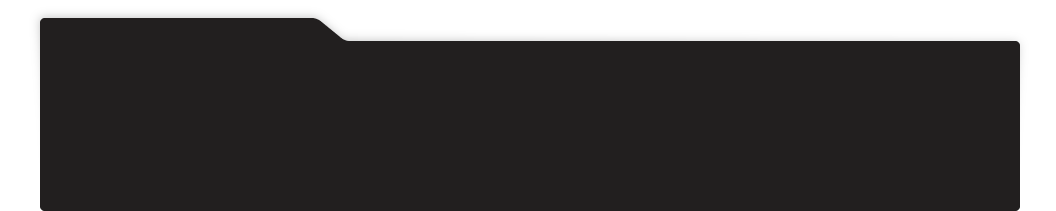
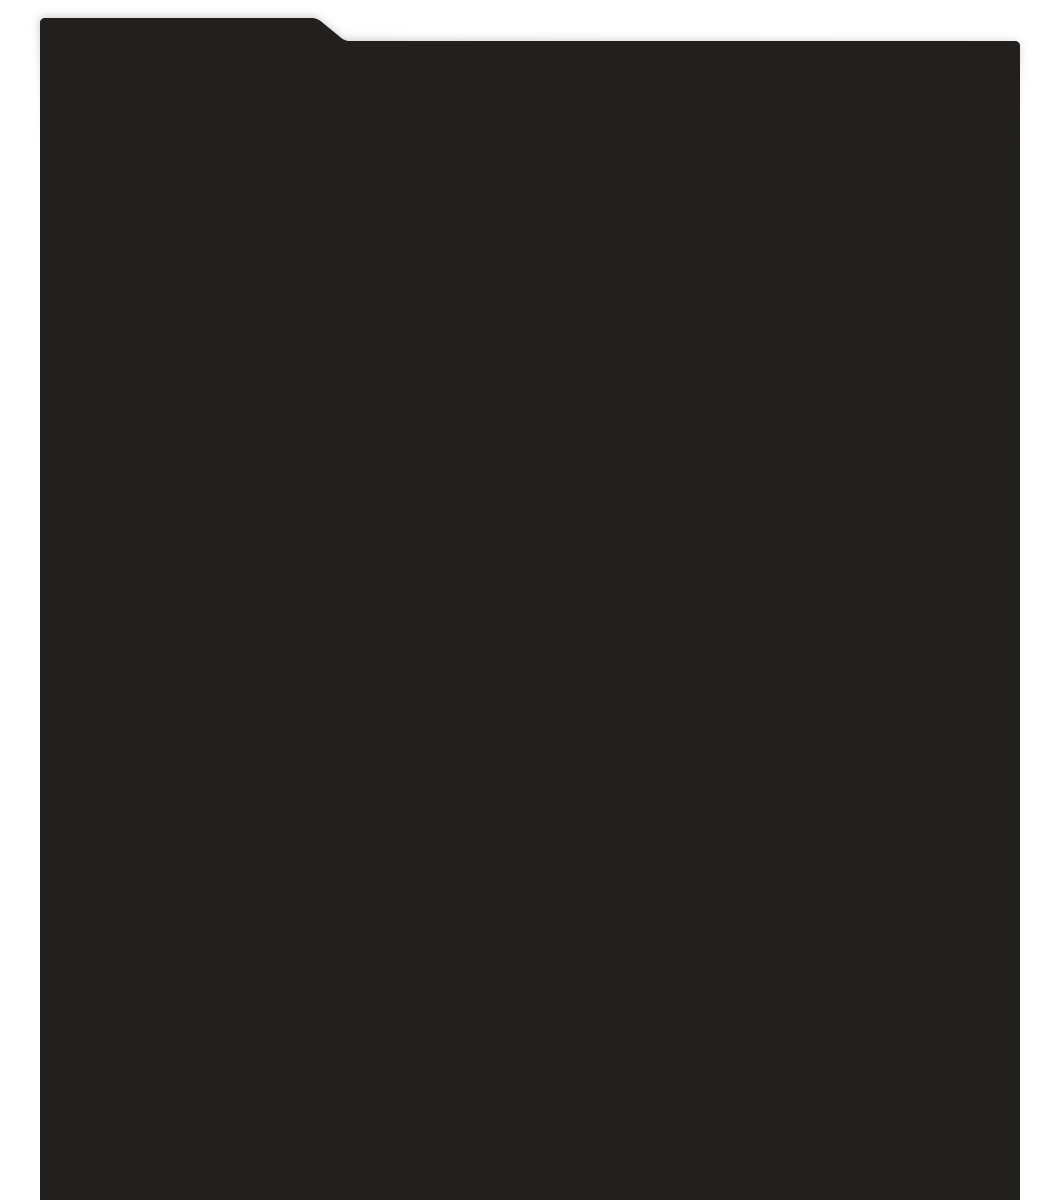
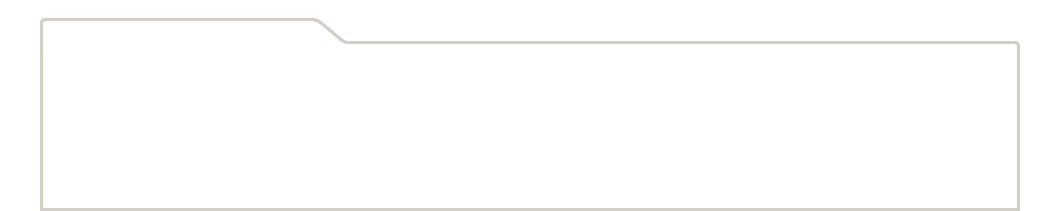
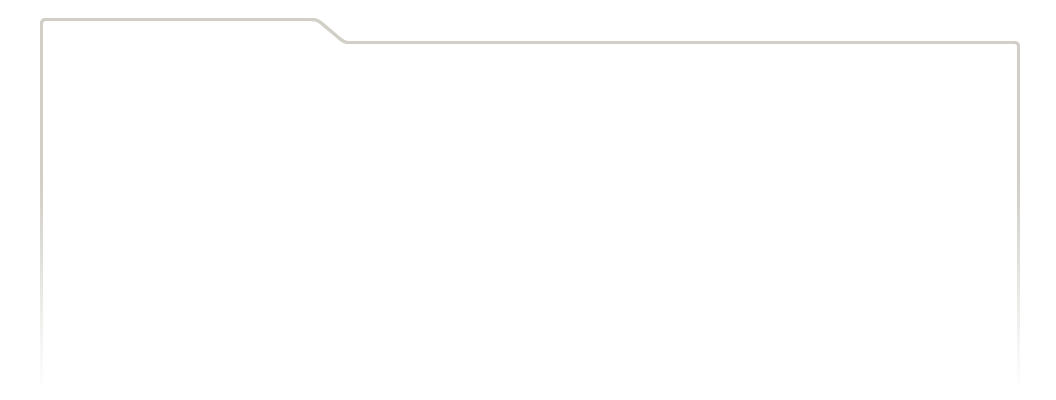
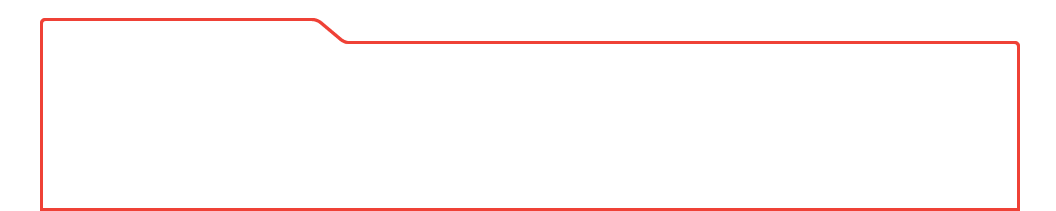
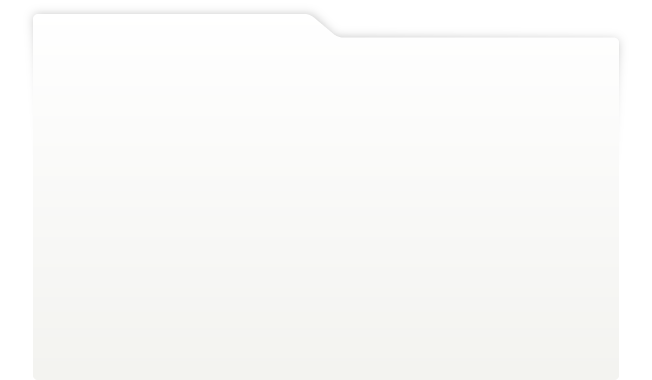
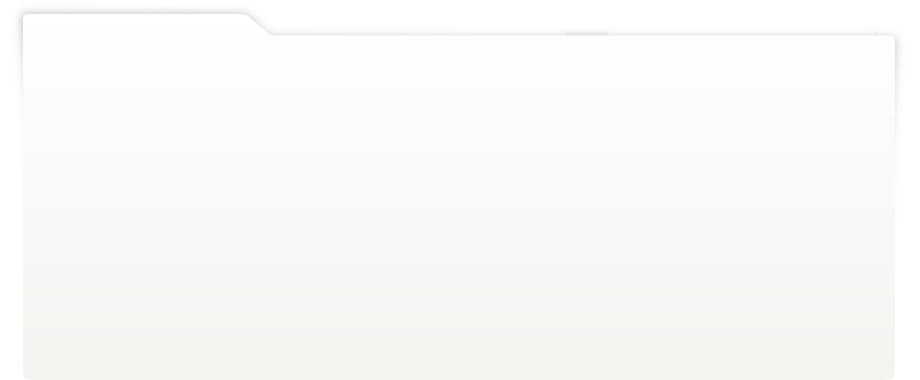
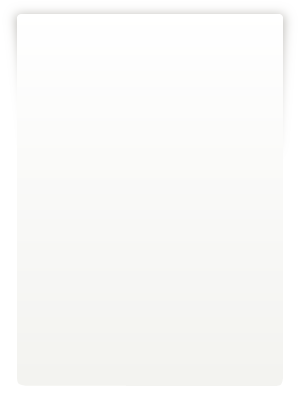
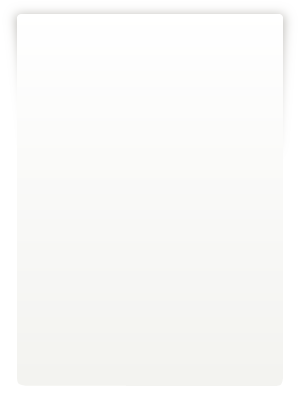
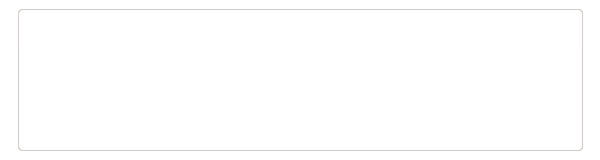
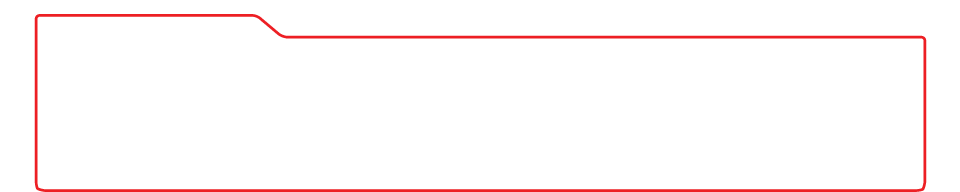
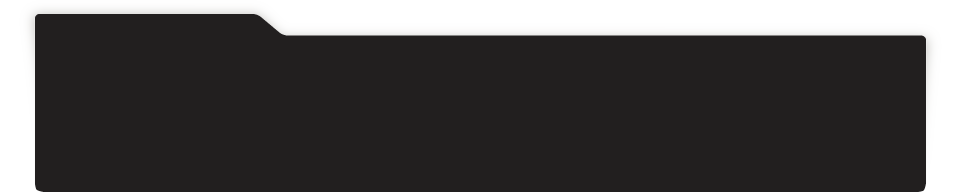
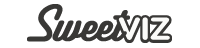
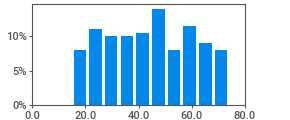
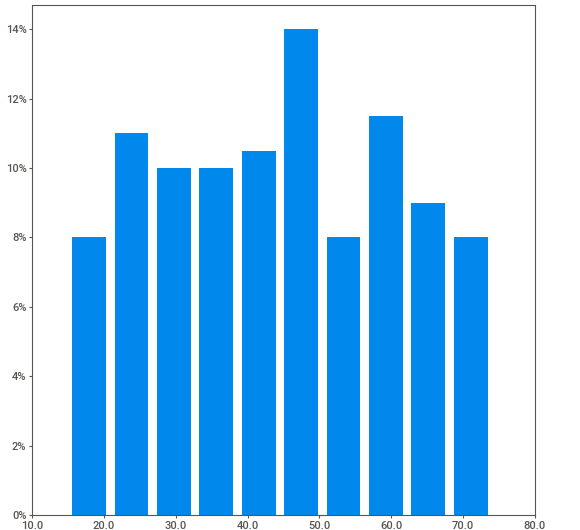
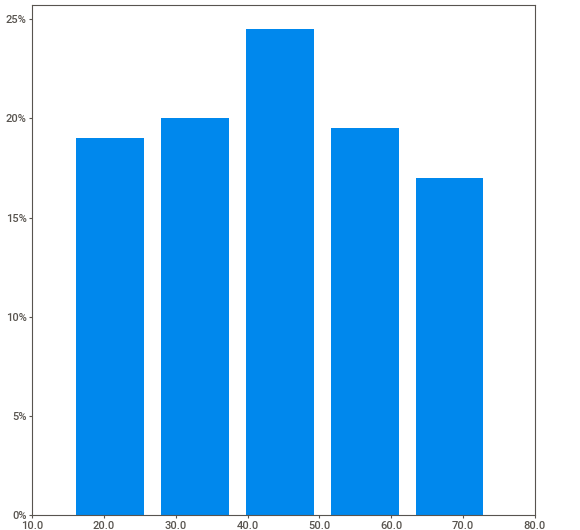
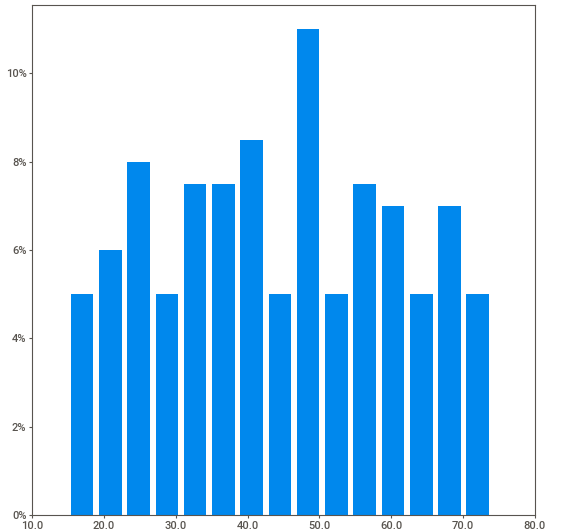
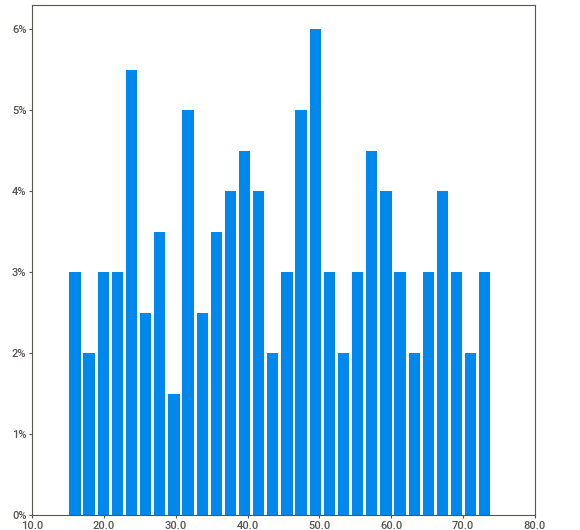
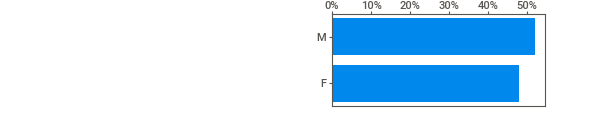
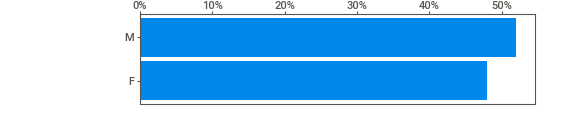
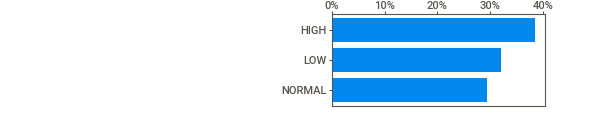
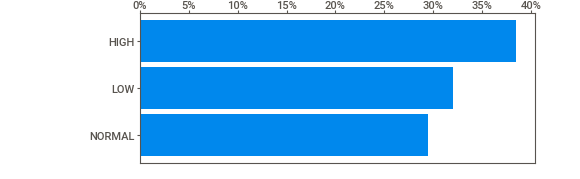
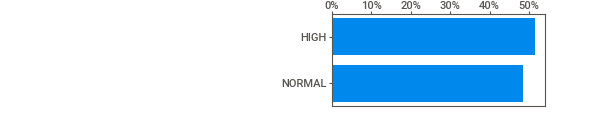
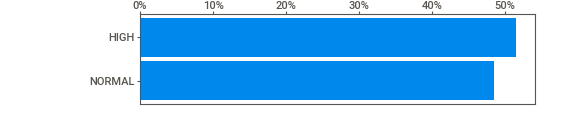
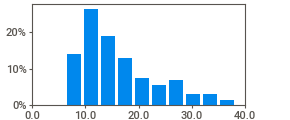
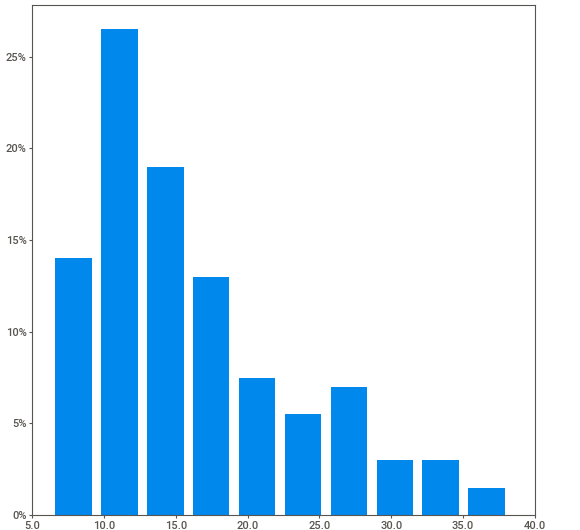
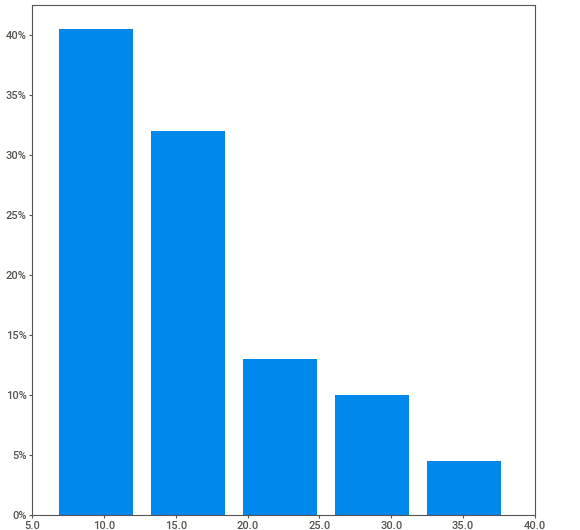
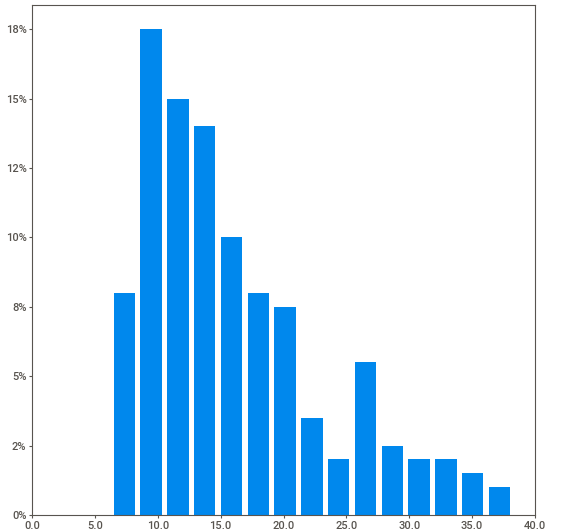
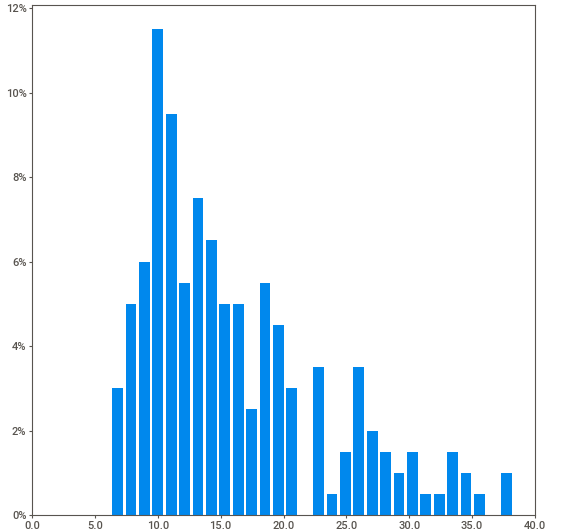
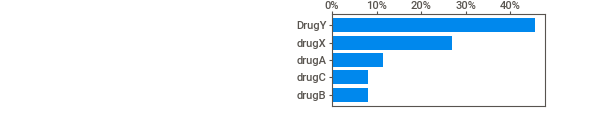
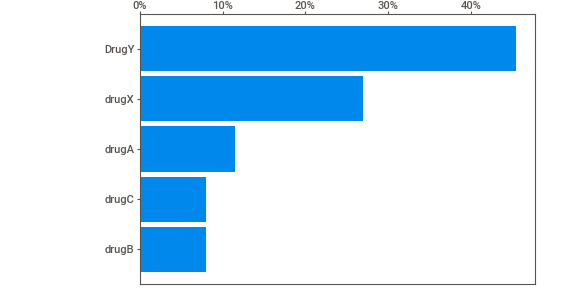
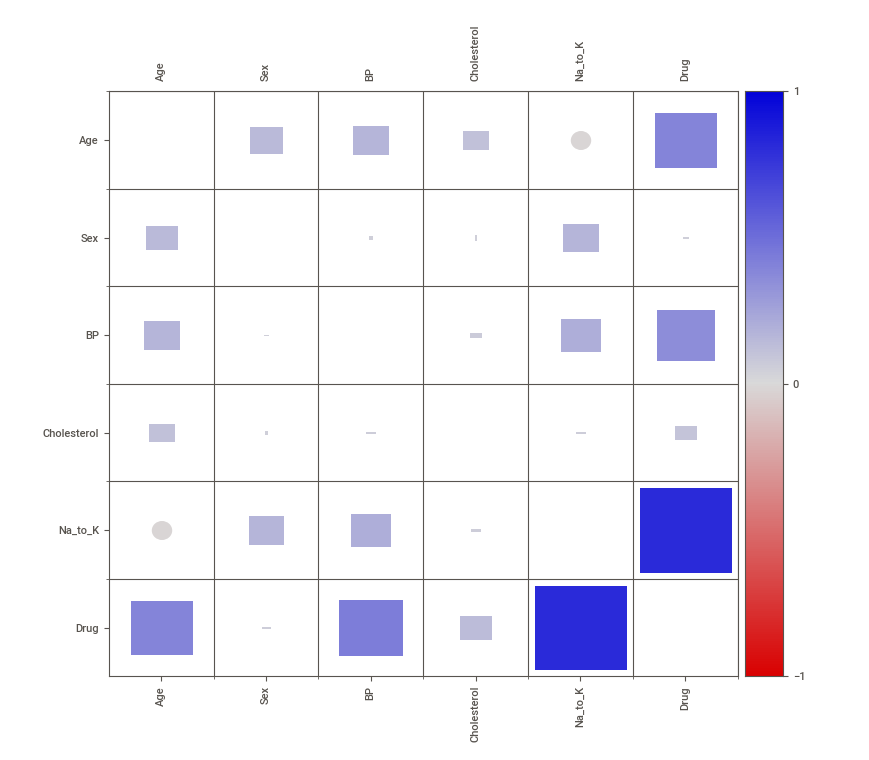
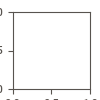

In [25]:
My_Report = sv.analyze(df)
My_Report.show_notebook(w=None, h=None, scale=None, layout="widescreen", filepath=None)

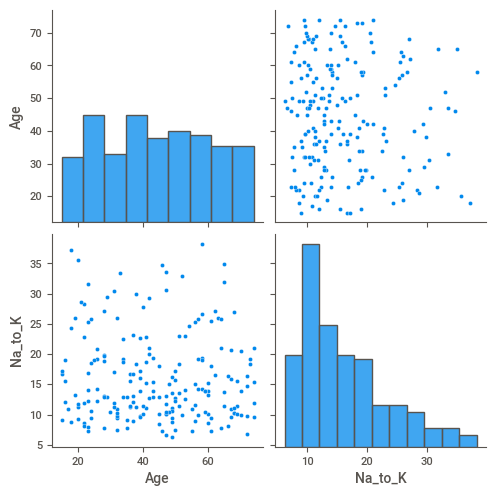

In [26]:
sns.pairplot(df)

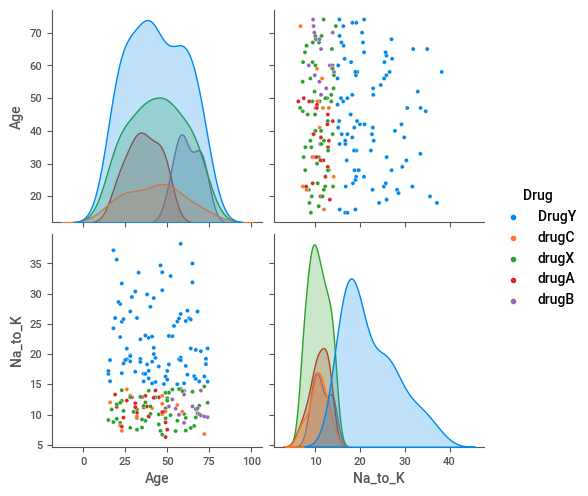

In [27]:
sns.pairplot(df, hue = 'Drug')

<AxesSubplot:>

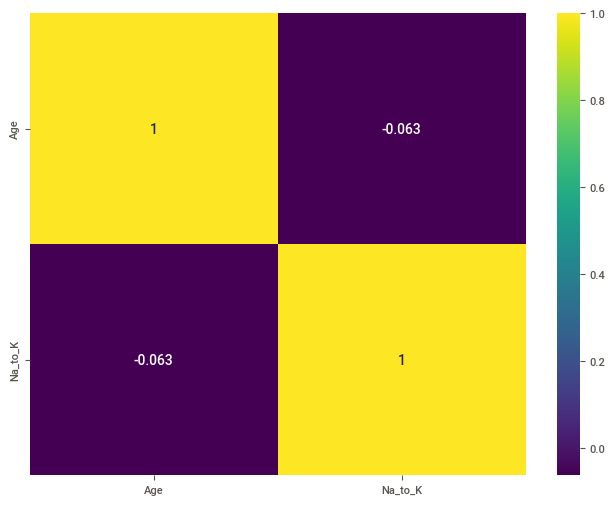

In [28]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap = "viridis" , annot=True)

In [29]:
# Label Encoding
df["Sex"].replace({"M":1, "F":0}, inplace=True)
df["BP"].replace({"HIGH":1, "LOW":-1, "NORMAL":0}, inplace=True)
df["Cholesterol"].replace({"HIGH":1, "NORMAL":0}, inplace=True)
df["Drug"].replace({"DrugY":0, "drugX":1, "drugA":2, "drugB":3, "drugC":4}, inplace=True)

In [30]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,1,25.355,0
1,47,1,-1,1,13.093,4
2,47,1,-1,1,10.114,4
3,28,0,0,1,7.798,1
4,61,0,-1,1,18.043,0
...,...,...,...,...,...,...
195,56,0,-1,1,11.567,4
196,16,1,-1,1,12.006,4
197,52,1,0,1,9.894,1
198,23,1,0,0,14.020,1


In [31]:
corr = df.corr()
print(corr)

                  Age       Sex        BP  Cholesterol   Na_to_K      Drug
Age          1.000000  0.102027 -0.120918     0.068234 -0.063119  0.084197
Sex          0.102027  1.000000 -0.044952     0.008811 -0.125008  0.084964
BP          -0.120918 -0.044952  1.000000    -0.032208  0.036871 -0.008388
Cholesterol  0.068234  0.008811 -0.032208     1.000000 -0.010000  0.180129
Na_to_K     -0.063119 -0.125008  0.036871    -0.010000  1.000000 -0.601548
Drug         0.084197  0.084964 -0.008388     0.180129 -0.601548  1.000000


<AxesSubplot:>

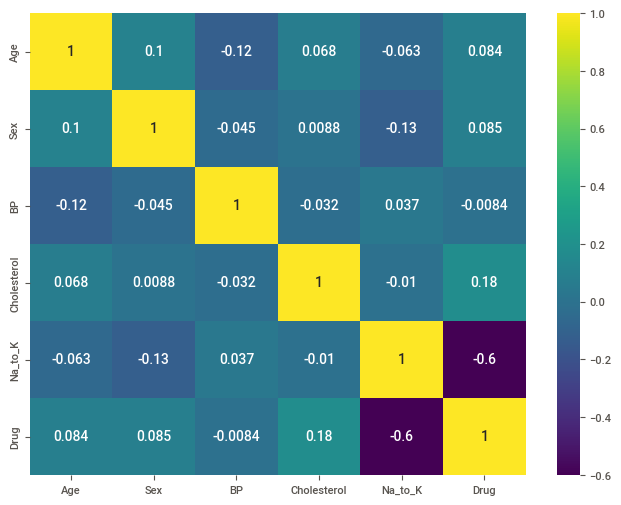

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap = "viridis" , annot=True)

In [33]:
df1 = df.copy()

In [34]:
df1.shape

(200, 6)

## Model Application

In [35]:
from sklearn.neighbors import KNeighborsClassifier

## Sampling Function

### Considered in paper

| Sampling Ratio | Training Data | Testing Data |
| --- | --- | --- |
| 90 : 10 | 180 | 20 |
| 80 : 20 | 160 | 40 |
| 70 : 30 | 140 | 60 |

### Updated Version

| Sampling Ratio | Training Data | Testing Data |
| --- | --- | --- |
| 60 : 40 | 120 | 80 |
| 50 : 50 | 100 | 100 |

In [36]:
y = df1['Drug']
X = df1.drop(['Drug'], axis = 1)

In [37]:
def build_test_model(tsz, X, y):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    #Train the model
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(X_train, y_train)

    #Validate on training 
    y_pred_tr = knn_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = knn_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    return (cm_tr, acc_tr, cm_ts, acc_ts, cr)

In [38]:
build_test_model(0.4, X, y)

(array([[55,  0,  0,  0,  0],
        [ 1, 33,  0,  0,  0],
        [ 0,  6,  7,  0,  0],
        [ 0,  4,  0,  8,  0],
        [ 0,  5,  0,  0,  1]], dtype=int64),
 0.8666666666666667,
 array([[30,  4,  1,  1,  0],
        [ 1, 15,  1,  3,  0],
        [ 0,  7,  3,  0,  0],
        [ 0,  3,  0,  1,  0],
        [ 0,  5,  1,  2,  2]], dtype=int64),
 0.6375,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.83      0.90        36\n           1       0.44      0.75      0.56        20\n           2       0.50      0.30      0.37        10\n           3       0.14      0.25      0.18         4\n           4       1.00      0.20      0.33        10\n\n    accuracy                           0.64        80\n   macro avg       0.61      0.47      0.47        80\nweighted avg       0.74      0.64      0.64        80\n')

In [39]:
build_test_model(0.5, X, y)

(array([[51,  0,  0,  0,  0],
        [ 0, 24,  0,  0,  0],
        [ 2,  4,  4,  0,  0],
        [ 2,  5,  0,  1,  0],
        [ 0,  3,  0,  0,  4]], dtype=int64),
 0.84,
 array([[39,  1,  0,  0,  0],
        [ 8, 19,  2,  0,  1],
        [ 2,  8,  3,  0,  0],
        [ 0,  7,  0,  1,  0],
        [ 0,  8,  0,  1,  0]], dtype=int64),
 0.62,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.97      0.88        40\n           1       0.44      0.63      0.52        30\n           2       0.60      0.23      0.33        13\n           3       0.50      0.12      0.20         8\n           4       0.00      0.00      0.00         9\n\n    accuracy                           0.62       100\n   macro avg       0.47      0.39      0.39       100\nweighted avg       0.57      0.62      0.57       100\n')

### Experimental Results with sampling ratio

| Sampling Ratio | Training Accuracy | Testing Accuracy |
| --- | --- | --- |
| 60 : 40 | 90 % | 72 % |
| 50 : 50 | 81 % | 73 % |

## Distance Metrics

In [40]:
# Distance Metrics
from scipy.stats import pearsonr

# Replace Outcome values with categorical labels
df['Drug'].replace({0: 'DrugY', 1: 'drugX', 2: 'drugA', 3: 'drugB', 4: 'drugC'}, inplace=True)

# Define X and y
X = df.drop(['Drug'], axis=1)
y = df['Drug']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Define correlation distance function
def correlation_distance(x1, x2):
    corr, _ = pearsonr(x1, x2)
    return 1 - corr  # Convert correlation coefficient to a distance measure

# Build KNN models for Euclidean distance and correlation distance
knn_model_euclidean = KNeighborsClassifier(n_neighbors=2, metric=euclidean_distance)
knn_model_correlation = KNeighborsClassifier(n_neighbors=2, metric=correlation_distance)

# Fit models on training data
knn_model_euclidean.fit(X_train, y_train)
knn_model_correlation.fit(X_train, y_train)

# Predict on test data
y_pred_euclidean = knn_model_euclidean.predict(X_test)
y_pred_correlation = knn_model_correlation.predict(X_test)

# Compute accuracy scores
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
acc_correlation = accuracy_score(y_test, y_pred_correlation)

# Print accuracy scores
print("Euclidean Distance - Test Accuracy:", acc_euclidean)
print("Correlation Distance - Test Accuracy:", acc_correlation)

# Confusion matrix
print("\nConfusion Matrix for Euclidean Distance:")
print(confusion_matrix(y_test, y_pred_euclidean))
print("\nConfusion Matrix for Correlation Distance:")
print(confusion_matrix(y_test, y_pred_correlation))

# Classification report
print("\nClassification Report for Euclidean Distance:")
print(classification_report(y_test, y_pred_euclidean))
print("\nClassification Report for Correlation Distance:")
print(classification_report(y_test, y_pred_correlation))

Euclidean Distance - Test Accuracy: 0.7
Correlation Distance - Test Accuracy: 0.5

Confusion Matrix for Euclidean Distance:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  2  0  1]
 [ 0  3  0  1  1]
 [ 0  2  3  2  4]]

Confusion Matrix for Correlation Distance:
[[15  0  0  0  0]
 [ 4  1  1  0  0]
 [ 0  2  1  0  0]
 [ 3  0  1  0  1]
 [ 5  2  1  0  3]]

Classification Report for Euclidean Distance:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       0.55      1.00      0.71         6
       drugB       0.40      0.67      0.50         3
       drugC       0.33      0.20      0.25         5
       drugX       0.67      0.36      0.47        11

    accuracy                           0.70        40
   macro avg       0.59      0.65      0.59        40
weighted avg       0.71      0.70      0.68        40


Classification Report for Correlation Distance:
              precision    recall  f1-score   support

       Dru

## Normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def norm(df, norm_tech):
    df[['Na_to_K', 'Age']] = norm_tech.fit_transform(df[['Na_to_K', 'Age']])
    return df

In [42]:
norm(df, MinMaxScaler())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.135593,0,1,1,0.596848,DrugY
1,0.542373,1,-1,1,0.213397,drugC
2,0.542373,1,-1,1,0.120239,drugC
3,0.220339,0,0,1,0.047814,drugX
4,0.779661,0,-1,1,0.368191,DrugY
...,...,...,...,...,...,...
195,0.694915,0,-1,1,0.165676,drugC
196,0.016949,1,-1,1,0.179405,drugC
197,0.627119,1,0,1,0.113359,drugX
198,0.135593,1,0,0,0.242385,drugX


In [43]:
norm(df, StandardScaler())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,0,1,1,1.286522,DrugY
1,0.162699,1,-1,1,-0.415145,drugC
2,0.162699,1,-1,1,-0.828558,drugC
3,-0.988614,0,0,1,-1.149963,drugX
4,1.011034,0,-1,1,0.271794,DrugY
...,...,...,...,...,...,...
195,0.708057,0,-1,1,-0.626917,drugC
196,-1.715759,1,-1,1,-0.565995,drugC
197,0.465676,1,0,1,-0.859089,drugX
198,-1.291591,1,0,0,-0.286500,drugX


In [44]:
norm(df, RobustScaler())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-0.814815,0,1,1,1.278023,DrugY
1,0.074074,1,-1,1,-0.094409,drugC
2,0.074074,1,-1,1,-0.427836,drugC
3,-0.629630,0,0,1,-0.687056,drugX
4,0.592593,0,-1,1,0.459623,DrugY
...,...,...,...,...,...,...
195,0.407407,0,-1,1,-0.265208,drugC
196,-1.074074,1,-1,1,-0.216073,drugC
197,0.259259,1,0,1,-0.452460,drugX
198,-0.814815,1,0,0,0.009346,drugX


In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def build_test_model(tsz, df, norm_tech):
    df1 = df.copy()
    df1["Drug"].replace({"DrugY": 0, "drugX": 1, "drugA": 2, "drugB": 3, "drugC": 4}, inplace=True)
    
    #Get features and target data
    y = df1['Drug'].astype(int)
    X = df1.drop(['Drug'], axis = 1)
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    #Train the model
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(X_train, y_train)

    #Validate on training
    y_pred_tr = knn_model.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = knn_model.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    return (cm_tr, acc_tr, cm_ts, acc_ts, cr)


In [46]:
build_test_model(0.4, df, MinMaxScaler())

(array([[51,  0,  0,  0,  0],
        [ 1, 37,  0,  0,  0],
        [ 0,  0, 16,  0,  0],
        [ 1,  0,  0,  6,  0],
        [ 3,  0,  0,  0,  5]], dtype=int64),
 0.9583333333333334,
 array([[38,  0,  0,  1,  1],
        [ 2, 14,  0,  0,  0],
        [ 1,  0,  6,  0,  0],
        [ 1,  0,  2,  6,  0],
        [ 2,  0,  0,  0,  6]], dtype=int64),
 0.875,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90        40\n           1       1.00      0.88      0.93        16\n           2       0.75      0.86      0.80         7\n           3       0.86      0.67      0.75         9\n           4       0.86      0.75      0.80         8\n\n    accuracy                           0.88        80\n   macro avg       0.87      0.82      0.84        80\nweighted avg       0.88      0.88      0.87        80\n')

In [47]:
build_test_model(0.4, df, RobustScaler())

(array([[54,  0,  0,  0,  0],
        [ 1, 27,  0,  0,  0],
        [ 0,  0, 16,  0,  0],
        [ 1,  0,  1,  9,  0],
        [ 1,  0,  0,  0, 10]], dtype=int64),
 0.9666666666666667,
 array([[31,  4,  1,  1,  0],
        [ 6, 20,  0,  0,  0],
        [ 0,  0,  7,  0,  0],
        [ 1,  0,  1,  3,  0],
        [ 0,  1,  0,  0,  4]], dtype=int64),
 0.8125,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83        37\n           1       0.80      0.77      0.78        26\n           2       0.78      1.00      0.88         7\n           3       0.75      0.60      0.67         5\n           4       1.00      0.80      0.89         5\n\n    accuracy                           0.81        80\n   macro avg       0.83      0.80      0.81        80\nweighted avg       0.81      0.81      0.81        80\n')

In [48]:
build_test_model(0.4, df, StandardScaler())

(array([[58,  0,  0,  0,  0],
        [ 0, 32,  0,  0,  0],
        [ 1,  0, 12,  0,  0],
        [ 0,  0,  1,  8,  0],
        [ 1,  0,  0,  0,  7]], dtype=int64),
 0.975,
 array([[30,  2,  0,  1,  0],
        [ 4, 18,  0,  0,  0],
        [ 1,  0,  9,  0,  0],
        [ 2,  0,  2,  3,  0],
        [ 4,  0,  0,  0,  4]], dtype=int64),
 0.8,
 '              precision    recall  f1-score   support\n\n           0       0.73      0.91      0.81        33\n           1       0.90      0.82      0.86        22\n           2       0.82      0.90      0.86        10\n           3       0.75      0.43      0.55         7\n           4       1.00      0.50      0.67         8\n\n    accuracy                           0.80        80\n   macro avg       0.84      0.71      0.75        80\nweighted avg       0.82      0.80      0.79        80\n')

In [49]:
build_test_model(0.5, df, MinMaxScaler())

(array([[54,  0,  0,  0,  0],
        [ 1, 23,  0,  0,  0],
        [ 1,  0, 10,  0,  0],
        [ 1,  0,  0,  4,  0],
        [ 3,  0,  0,  0,  3]], dtype=int64),
 0.94,
 array([[35,  1,  1,  0,  0],
        [12, 18,  0,  0,  0],
        [ 6,  1,  5,  0,  0],
        [ 6,  0,  2,  3,  0],
        [ 4,  0,  0,  0,  6]], dtype=int64),
 0.67,
 '              precision    recall  f1-score   support\n\n           0       0.56      0.95      0.70        37\n           1       0.90      0.60      0.72        30\n           2       0.62      0.42      0.50        12\n           3       1.00      0.27      0.43        11\n           4       1.00      0.60      0.75        10\n\n    accuracy                           0.67       100\n   macro avg       0.82      0.57      0.62       100\nweighted avg       0.76      0.67      0.66       100\n')

In [50]:
build_test_model(0.5, df, RobustScaler())

(array([[49,  0,  0,  0,  0],
        [ 4, 20,  0,  0,  0],
        [ 1,  0, 11,  0,  0],
        [ 0,  0,  0,  8,  0],
        [ 3,  0,  0,  0,  4]], dtype=int64),
 0.92,
 array([[41,  0,  1,  0,  0],
        [ 3, 27,  0,  0,  0],
        [ 4,  0,  7,  0,  0],
        [ 3,  0,  3,  2,  0],
        [ 4,  0,  0,  0,  5]], dtype=int64),
 0.82,
 '              precision    recall  f1-score   support\n\n           0       0.75      0.98      0.85        42\n           1       1.00      0.90      0.95        30\n           2       0.64      0.64      0.64        11\n           3       1.00      0.25      0.40         8\n           4       1.00      0.56      0.71         9\n\n    accuracy                           0.82       100\n   macro avg       0.88      0.66      0.71       100\nweighted avg       0.85      0.82      0.81       100\n')

In [51]:
build_test_model(0.5, df, StandardScaler())

(array([[41,  0,  0,  0,  0],
        [ 1, 30,  0,  0,  0],
        [ 2,  0,  7,  0,  0],
        [ 0,  0,  1,  9,  0],
        [ 0,  0,  0,  0,  9]], dtype=int64),
 0.96,
 array([[42,  4,  0,  1,  3],
        [ 3, 20,  0,  0,  0],
        [ 5,  0,  9,  0,  0],
        [ 2,  0,  1,  3,  0],
        [ 1,  1,  0,  0,  5]], dtype=int64),
 0.79,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.84      0.82        50\n           1       0.80      0.87      0.83        23\n           2       0.90      0.64      0.75        14\n           3       0.75      0.50      0.60         6\n           4       0.62      0.71      0.67         7\n\n    accuracy                           0.79       100\n   macro avg       0.77      0.71      0.73       100\nweighted avg       0.79      0.79      0.79       100\n')

### Before & After applying Normlization Testing Results

### when test size = 0.4

| Normalization | Before | After |
| --- | --- | --- |
| MinMax | 72 % | 86 % |
| Standard | 72 % | 82 % |
| Robust | 72 % | 86 % |

### when test size = 0.5

| Normalization | Before | After |
| --- | --- | --- |
| MinMax | 73 % | 77 % |
| Standard | 73 % | 83 % |
| Robust | 73 % | 84 % |

## Dimesionality Reduction

In [52]:
# Dimesionality Reduction
# List to store results
results = []
# Loop over different dimensions
for dim in [2, 3, 4, 5]:
    # Select the first 'dim' number of columns from X
    X_dim = X.iloc[:, :dim]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_dim, y, test_size=0.2, random_state=42)

    # Build the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(X_train, y_train)

    # Predict on training and test sets
    y_pred_tr = knn_model.predict(X_train)
    y_pred_ts = knn_model.predict(X_test)

    # Compute accuracy scores
    acc_tr = accuracy_score(y_train, y_pred_tr)
    acc_ts = accuracy_score(y_test, y_pred_ts)

    # Store results
    results.append((dim, acc_tr, acc_ts))

# Print results
print("Dimension\tTrain Accuracy\tTest Accuracy")
for result in results:
    print(f"{result[0]}\t\t{result[1]:.4f}\t\t{result[2]:.4f}")


Dimension	Train Accuracy	Test Accuracy
2		0.5750		0.2750
3		0.6375		0.3500
4		0.7063		0.3750
5		0.8562		0.7000


## Naive Bayes Classifier

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
def build_test_model(tsz, X, y):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    #Train the model
    NB = GaussianNB()
    NB.fit(X_train, y_train)

    #Validate on training 
    y_pred_tr = NB.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = NB.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    return (cm_tr, acc_tr, cm_ts, acc_ts, cr)

In [55]:
build_test_model(0.5, X, y)

(array([[31,  5,  2,  7,  0],
        [ 0, 12,  0,  0,  0],
        [ 0,  1,  8,  0,  0],
        [ 0,  0,  0,  9,  0],
        [ 0,  0,  0,  0, 25]], dtype=int64),
 0.85,
 array([[37,  2,  3,  4,  0],
        [ 0, 11,  0,  0,  0],
        [ 0,  1,  6,  0,  0],
        [ 0,  0,  0,  7,  0],
        [ 1,  0,  0,  0, 28]], dtype=int64),
 0.89,
 '              precision    recall  f1-score   support\n\n       DrugY       0.97      0.80      0.88        46\n       drugA       0.79      1.00      0.88        11\n       drugB       0.67      0.86      0.75         7\n       drugC       0.64      1.00      0.78         7\n       drugX       1.00      0.97      0.98        29\n\n    accuracy                           0.89       100\n   macro avg       0.81      0.93      0.85       100\nweighted avg       0.92      0.89      0.89       100\n')

## Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
def build_test_model(tsz, X, y):
    
    #Create training-testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tsz)
    #Train the model
    dt= DecisionTreeClassifier()
    dt.fit(X_train,y_train)

    #Validate on training 
    y_pred_tr = dt.predict(X_train)
    cm_tr = confusion_matrix(y_train, y_pred_tr)
    acc_tr = accuracy_score (y_train, y_pred_tr)

    #Validate on testing
    y_pred_ts = dt.predict(X_test)
    cm_ts = confusion_matrix(y_test, y_pred_ts)
    acc_ts = accuracy_score (y_test, y_pred_ts)

    cr = classification_report(y_test, y_pred_ts)

    return (cm_tr, acc_tr, cm_ts, acc_ts, cr)

In [58]:
build_test_model(0.5, X, y)

(array([[51,  0,  0,  0,  0],
        [ 0, 12,  0,  0,  0],
        [ 0,  0,  6,  0,  0],
        [ 0,  0,  0,  6,  0],
        [ 0,  0,  0,  0, 25]], dtype=int64),
 1.0,
 array([[40,  0,  0,  0,  0],
        [ 0, 11,  0,  0,  0],
        [ 0,  1,  9,  0,  0],
        [ 0,  0,  0, 10,  0],
        [ 0,  0,  0,  0, 29]], dtype=int64),
 0.99,
 '              precision    recall  f1-score   support\n\n       DrugY       1.00      1.00      1.00        40\n       drugA       0.92      1.00      0.96        11\n       drugB       1.00      0.90      0.95        10\n       drugC       1.00      1.00      1.00        10\n       drugX       1.00      1.00      1.00        29\n\n    accuracy                           0.99       100\n   macro avg       0.98      0.98      0.98       100\nweighted avg       0.99      0.99      0.99       100\n')

## Cross- Validation

In [60]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=2)

# k-fold cross-validation
kf = KFold(n_splits= 2, shuffle=True, random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Printing the results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation scores: [0.67 0.7 ]
Mean accuracy: 0.685
Standard deviation: 0.014999999999999958
